In [1]:
import numpy as np
#from scipy.integrate import odeint
import matplotlib.pyplot as plt


In [2]:
m=175
a1=5.0265
ps=2*10**7
fco=1.2*10**3
vo1=3.0877*10**-4
kqv=3.5635*10**-8
l=0.21
a2=3.0361
pt=0
b=1*10**5
vo2=2.3529*10**-4
G=m*9.81   
d=0   
be=10  
xp=0  
xpd=0 

In [3]:
#%%initial
u=0
x1=1
x2=1
x3=1
x4=1
dt=0.1
time=np.linspace(0,1,11)
np.array(time)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [4]:
#%% equation:5
def sg(u):
    if(u>=0):
        sg=1
    else:
        sg=0
    return sg

In [5]:
#%%equation 3
vh1=vo1+a1*xp
vh2=vo2+a2*(l-xp)

In [6]:
#%%equation 7
h1=(be/(vo1+a1*xp))
h2=(be/(vo2+a2*(l-xp)))
g3=(sg(u)*np.sqrt(ps-x3)+sg(-u)*np.sqrt(x3-pt))
g4=(sg(u)*np.sqrt(x4-pt)+sg(-u)*np.sqrt(ps-x4))

In [7]:
#%% equation:6 
x1_d=[]
x2_d=[]
x3_d=[]
x4_d=[]
def f(x1,x2,x3,x4,u):
    x1d=x2
    x2d=1/m*(a1*x3-a2*x4-b*x2-fco*np.tanh(x2)+G-d)
    x3d=(be/(vo1+a1*x1))*(-a1*x2+kqv*(sg(u)*np.sqrt(ps-x3)+sg(-u)*np.sqrt(x3-pt))*u)
    x4d=(be/(vo2+a2*(l-x1)))*(a2*x2-kqv*(sg(u)*np.sqrt(x4-pt)+sg(-u)*np.sqrt(ps-x4))*u)
    return x1d,x2d,x3d,x4d
for i in range(1,10):
    dt=time[i]-time[i-1]
    x1knew=(f(x1,x2,x3,x4,u)[0])*dt+x1
    x2knew=(f(x1,x2,x3,x4,u)[1])*dt+x2
    x3knew=(f(x1,x2,x3,x4,u)[2])*dt+x3
    x4knew=(f(x1,x2,x3,x4,u)[3])*dt+x4
    x1=x1knew
    x2=x2knew
    x3=x3knew
    x4=x4knew
    x1_d.append(x1)
    x2_d.append(x2)
    x3_d.append(x3)
    x4_d.append(x4)

C:\Users\atakan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


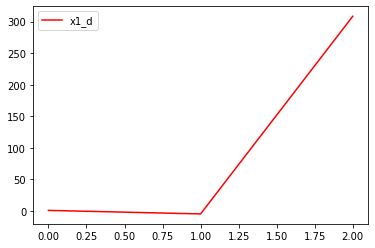

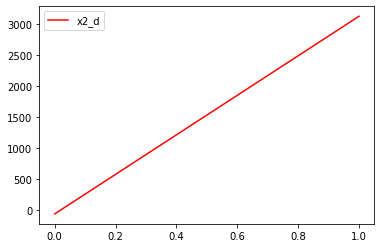

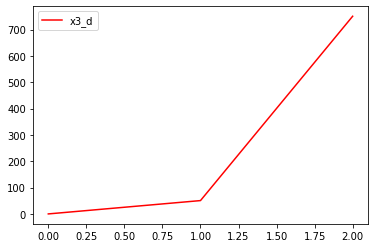

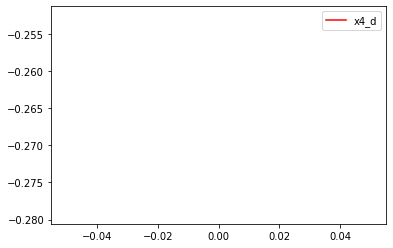

In [8]:
plt.figure()
plt.plot(x1_d,'r',label='x1_d')
plt.legend()
plt.figure()
plt.plot(x2_d,'r',label='x2_d')
plt.legend()
plt.figure()
plt.plot(x3_d,'r',label='x3_d')
plt.legend()
plt.figure()
plt.plot(x4_d,'r',label='x4_d')
plt.legend()